In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys
from pathlib import Path
path = Path(os.getcwd()).resolve().parent.parent
if path not in sys.path:
    sys.path.append(str(path))

In [2]:
DATA = path / "data"
TRAINED_DATA = DATA / "trained_data"
MODELS = DATA / "models"
METHOD = "SingleOutput"


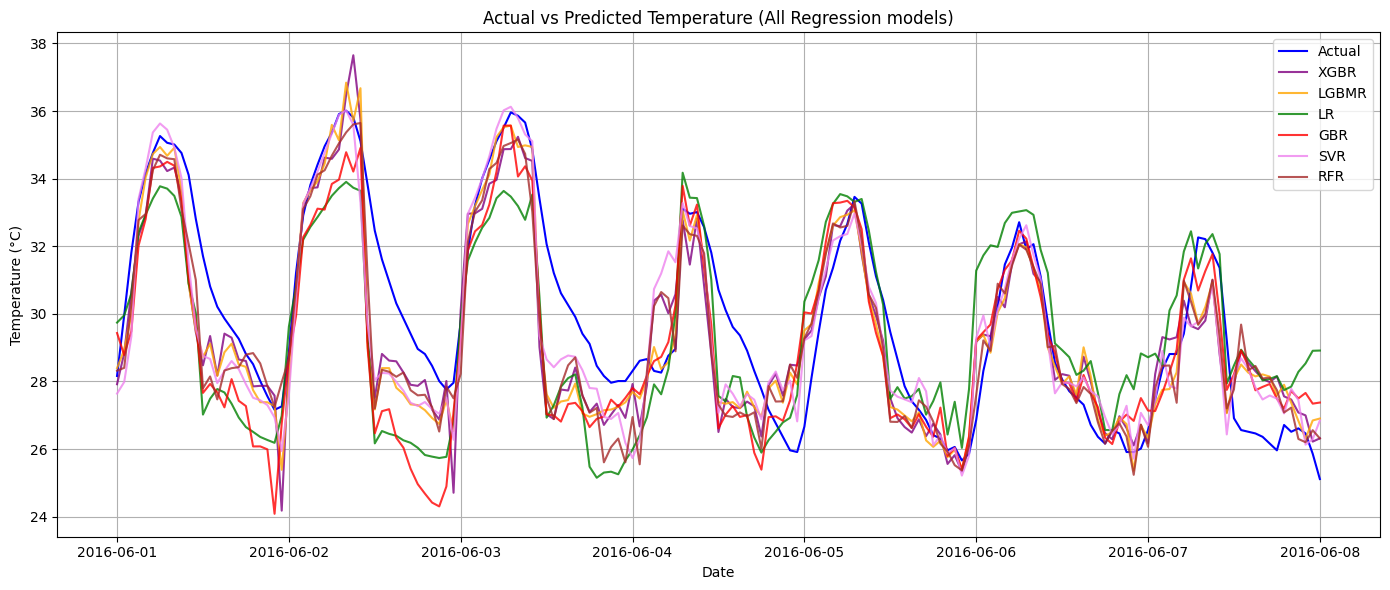

In [6]:
# Đọc dữ liệu và chuyển đổi cột date
test_df = pd.read_csv(f"{TRAINED_DATA}/{METHOD}/temperature_2m/test_df.csv", parse_dates=["date"])
model_predictions = pd.read_csv(f"{DATA}/scores&predictions/{METHOD}/temperature_2m/model_predictions.csv")

# Kiểm tra điều kiện: actual == temperature_2m_max
matching = model_predictions["actual"].values == test_df["temperature_2m"].values

# Gán cột 'date' từ test_df nếu giá trị actual khớp
model_predictions["date"] = np.where(
    matching,
    test_df["date"].values,  # nếu khớp, lấy ngày
    pd.NaT                   # nếu không khớp, để giá trị thời gian trống
)
model_predictions["date"] = pd.to_datetime(model_predictions["date"], errors="coerce")

mask = (model_predictions["date"] >= "2016-06-01 00") & (model_predictions["date"] <= "2016-06-08 00")
subset_df = model_predictions[mask]

# Vẽ biểu đồ
plt.figure(figsize=(14, 6))
plt.plot(subset_df["date"], subset_df["actual"], label="Actual", color="Blue")
plt.plot(subset_df["date"], subset_df["XGBoostRegressor_pred"], label="XGBR", color="Purple", alpha=0.8)
plt.plot(subset_df["date"], subset_df["LightGBMRegressor_pred"], label="LGBMR", color="Orange", alpha=0.8)
plt.plot(subset_df["date"], subset_df["LinearRegression_pred"], label="LR", color="Green", alpha=0.8)
plt.plot(subset_df["date"], subset_df["GradientBoostingRegressor_pred"], label="GBR", color="red", alpha=0.8)
plt.plot(subset_df["date"], subset_df["SupportVectorRegression_pred"], label="SVR", color="violet", alpha=0.8)
plt.plot(subset_df["date"], subset_df["RandomForestRegressor_pred"], label="RFR", color="brown", alpha=0.8)
plt.title("Actual vs Predicted Temperature (All Regression models)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


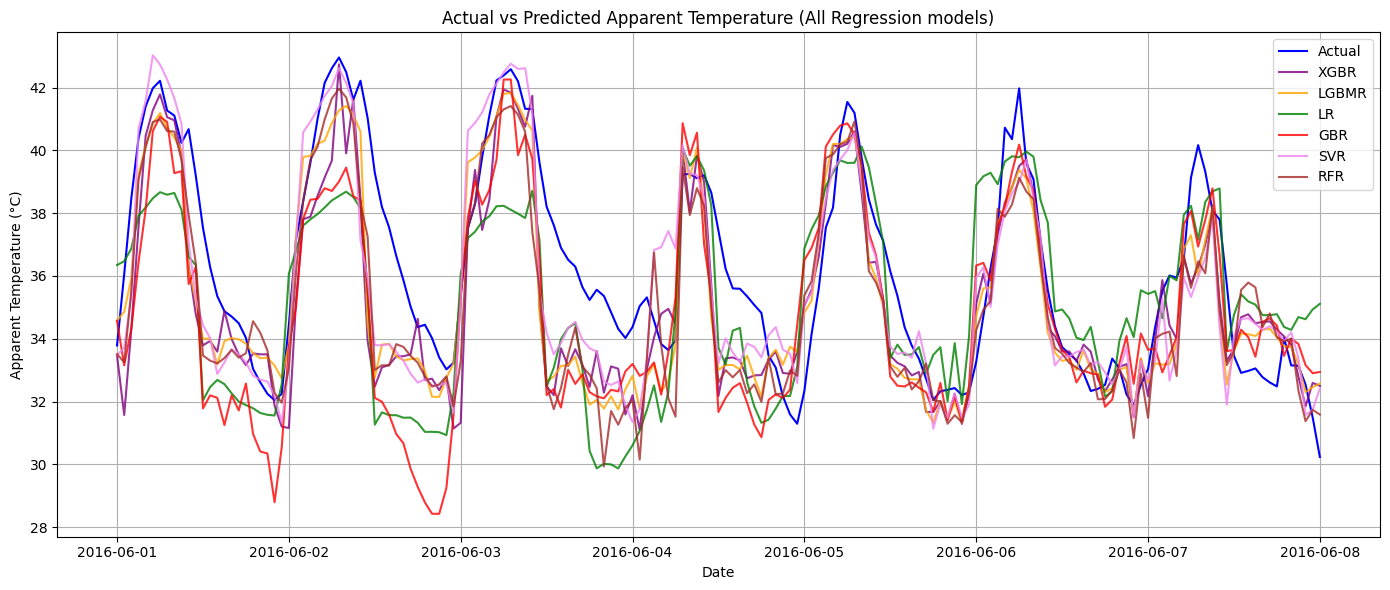

In [7]:
# Đọc dữ liệu và chuyển đổi cột date
test_df = pd.read_csv(f"{TRAINED_DATA}/{METHOD}/apparent_temperature/test_df.csv", parse_dates=["date"])
model_predictions = pd.read_csv(f"{DATA}/scores&predictions/{METHOD}/apparent_temperature/model_predictions.csv")

# Kiểm tra điều kiện: actual == temperature_2m_max
matching = model_predictions["actual"].values == test_df["apparent_temperature"].values

# Gán cột 'date' từ test_df nếu giá trị actual khớp
model_predictions["date"] = np.where(
    matching,
    test_df["date"].values,  # nếu khớp, lấy ngày
    pd.NaT                   # nếu không khớp, để giá trị thời gian trống
)
model_predictions["date"] = pd.to_datetime(model_predictions["date"], errors="coerce")

# Lọc khoảng thời gian từ 01/06/2016 đến 08/06/2016
mask = (model_predictions["date"] >= "2016-06-01 00") & (model_predictions["date"] <= "2016-06-08 00")
subset_df = model_predictions[mask]

# Vẽ biểu đồ
plt.figure(figsize=(14, 6))
plt.plot(subset_df["date"], subset_df["actual"], label="Actual", color="Blue")
plt.plot(subset_df["date"], subset_df["XGBoostRegressor_pred"], label="XGBR", color="Purple", alpha=0.8)
plt.plot(subset_df["date"], subset_df["LightGBMRegressor_pred"], label="LGBMR", color="Orange", alpha=0.8)
plt.plot(subset_df["date"], subset_df["LinearRegression_pred"], label="LR", color="Green", alpha=0.8)
plt.plot(subset_df["date"], subset_df["GradientBoostingRegressor_pred"], label="GBR", color="red", alpha=0.8)
plt.plot(subset_df["date"], subset_df["SupportVectorRegression_pred"], label="SVR", color="violet", alpha=0.8)
plt.plot(subset_df["date"], subset_df["RandomForestRegressor_pred"], label="RFR", color="brown", alpha=0.8)
plt.title("Actual vs Predicted Apparent Temperature (All Regression models)")
plt.xlabel("Date")
plt.ylabel("Apparent Temperature (°C)")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


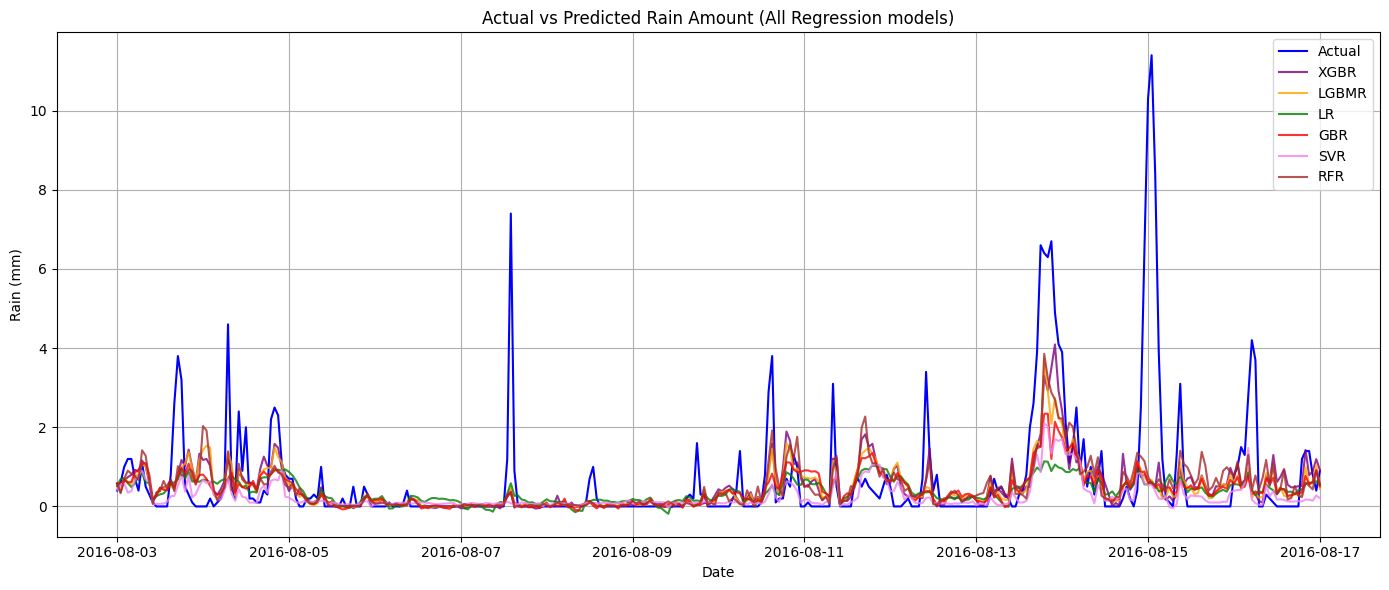

In [8]:
# Đọc dữ liệu và chuyển đổi cột date
test_df = pd.read_csv(f"{TRAINED_DATA}/{METHOD}/rain/test_df.csv", parse_dates=["date"])
model_predictions = pd.read_csv(f"{DATA}/scores&predictions/{METHOD}/rain/model_predictions.csv")

# Kiểm tra điều kiện: actual == temperature_2m_max
matching = model_predictions["actual"].values == test_df["rain"].values

# Gán cột 'date' từ test_df nếu giá trị actual khớp
model_predictions["date"] = np.where(
    matching,
    test_df["date"].values,  # nếu khớp, lấy ngày
    pd.NaT                   # nếu không khớp, để giá trị thời gian trống
)
model_predictions["date"] = pd.to_datetime(model_predictions["date"], errors="coerce")

mask = (model_predictions["date"] >= "2016-08-03 00") & (model_predictions["date"] <= "2016-8-17 00")
subset_df = model_predictions[mask]

# Vẽ biểu đồ
plt.figure(figsize=(14, 6))
plt.plot(subset_df["date"], subset_df["actual"], label="Actual", color="Blue")
plt.plot(subset_df["date"], subset_df["XGBoostRegressor_pred"], label="XGBR", color="Purple", alpha=0.8)
plt.plot(subset_df["date"], subset_df["LightGBMRegressor_pred"], label="LGBMR", color="Orange", alpha=0.8)
plt.plot(subset_df["date"], subset_df["LinearRegression_pred"], label="LR", color="Green", alpha=0.8)
plt.plot(subset_df["date"], subset_df["GradientBoostingRegressor_pred"], label="GBR", color="red", alpha=0.8)
plt.plot(subset_df["date"], subset_df["SupportVectorRegression_pred"], label="SVR", color="violet", alpha=0.8)
plt.plot(subset_df["date"], subset_df["RandomForestRegressor_pred"], label="RFR", color="brown", alpha=0.8)
plt.title("Actual vs Predicted Rain Amount (All Regression models)")
plt.xlabel("Date")
plt.ylabel("Rain (mm)")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


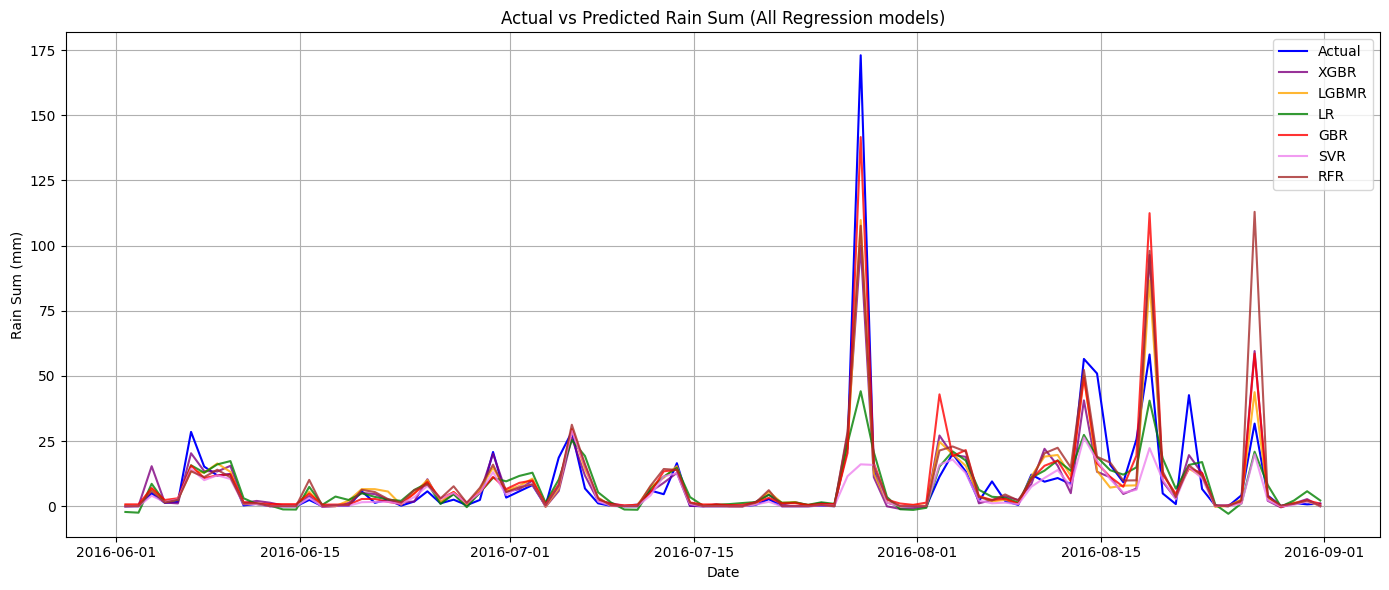

In [13]:
# Đọc dữ liệu và chuyển đổi cột date
test_df = pd.read_csv(f"{TRAINED_DATA}/{METHOD}/rain_sum/test_df.csv", parse_dates=["date"])
model_predictions = pd.read_csv(f"{DATA}/scores&predictions/{METHOD}/rain_sum/model_predictions.csv")

# Kiểm tra điều kiện: actual == temperature_2m_max
matching = model_predictions["actual"].values == test_df["rain_sum"].values

# Gán cột 'date' từ test_df nếu giá trị actual khớp
model_predictions["date"] = np.where(
    matching,
    test_df["date"].values,  # nếu khớp, lấy ngày
    pd.NaT                   # nếu không khớp, để giá trị thời gian trống
)
model_predictions["date"] = pd.to_datetime(model_predictions["date"], errors="coerce")

# Lọc khoảng thời gian từ 01/06/2016 đến 08/06/2016
mask = (model_predictions["date"] >= "2016-06-01 00") & (model_predictions["date"] <= "2016-9-01 00")
subset_df = model_predictions[mask]

# Vẽ biểu đồ
plt.figure(figsize=(14, 6))
plt.plot(subset_df["date"], subset_df["actual"], label="Actual", color="Blue")
plt.plot(subset_df["date"], subset_df["XGBoostRegressor_pred"], label="XGBR", color="Purple", alpha=0.8)
plt.plot(subset_df["date"], subset_df["LightGBMRegressor_pred"], label="LGBMR", color="Orange", alpha=0.8)
plt.plot(subset_df["date"], subset_df["LinearRegression_pred"], label="LR", color="Green", alpha=0.8)
plt.plot(subset_df["date"], subset_df["GradientBoostingRegressor_pred"], label="GBR", color="red", alpha=0.8)
plt.plot(subset_df["date"], subset_df["SupportVectorRegression_pred"], label="SVR", color="violet", alpha=0.8)
plt.plot(subset_df["date"], subset_df["RandomForestRegressor_pred"], label="RFR", color="brown", alpha=0.8)
plt.title("Actual vs Predicted Rain Sum (All Regression models)")
plt.xlabel("Date")
plt.ylabel("Rain Sum (mm)")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


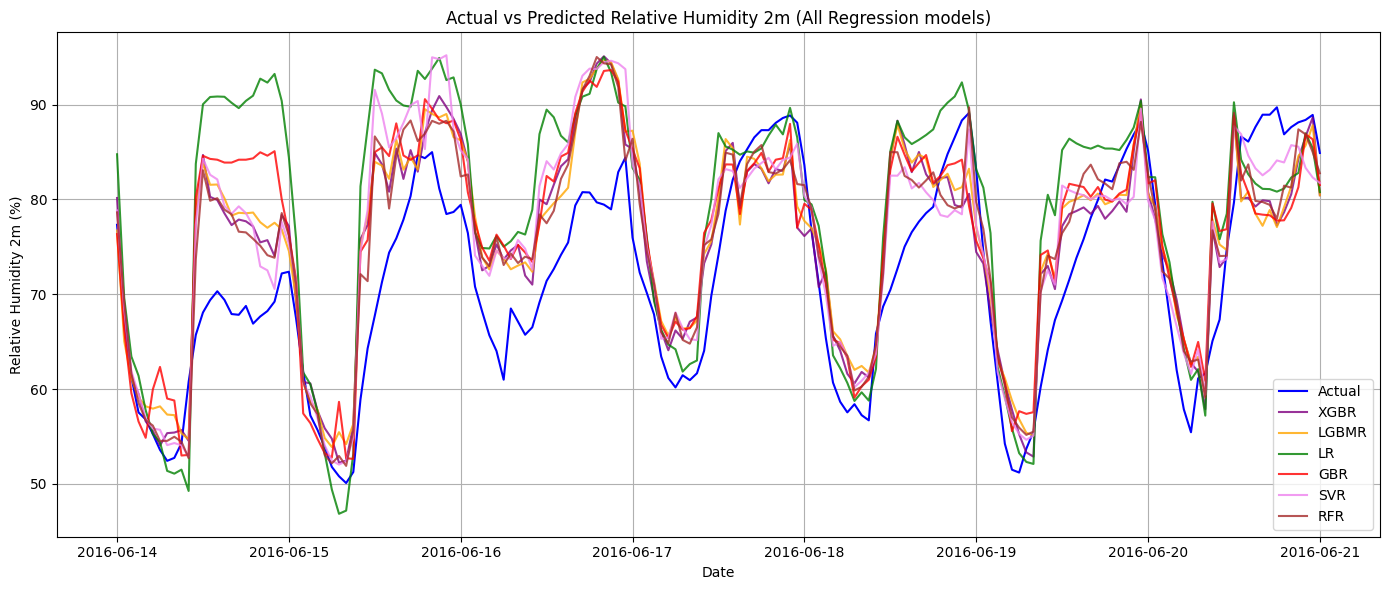

In [16]:
# Đọc dữ liệu và chuyển đổi cột date
test_df = pd.read_csv(f"{TRAINED_DATA}/{METHOD}/relative_humidity_2m/test_df.csv", parse_dates=["date"])
model_predictions = pd.read_csv(f"{DATA}/scores&predictions/{METHOD}/relative_humidity_2m/model_predictions.csv")

# Kiểm tra điều kiện: actual == temperature_2m_max
matching = model_predictions["actual"].values == test_df["relative_humidity_2m"].values

# Gán cột 'date' từ test_df nếu giá trị actual khớp
model_predictions["date"] = np.where(
    matching,
    test_df["date"].values,  # nếu khớp, lấy ngày
    pd.NaT                   # nếu không khớp, để giá trị thời gian trống
)
model_predictions["date"] = pd.to_datetime(model_predictions["date"], errors="coerce")

# Lọc khoảng thời gian từ 01/06/2016 đến 08/06/2016
mask = (model_predictions["date"] >= "2016-06-14 00") & (model_predictions["date"] <= "2016-06-21 00")
subset_df = model_predictions[mask]

# Vẽ biểu đồ
plt.figure(figsize=(14, 6))
plt.plot(subset_df["date"], subset_df["actual"], label="Actual", color="Blue")
plt.plot(subset_df["date"], subset_df["XGBoostRegressor_pred"], label="XGBR", color="Purple", alpha=0.8)
plt.plot(subset_df["date"], subset_df["LightGBMRegressor_pred"], label="LGBMR", color="Orange", alpha=0.8)
plt.plot(subset_df["date"], subset_df["LinearRegression_pred"], label="LR", color="Green", alpha=0.8)
plt.plot(subset_df["date"], subset_df["GradientBoostingRegressor_pred"], label="GBR", color="red", alpha=0.8)
plt.plot(subset_df["date"], subset_df["SupportVectorRegression_pred"], label="SVR", color="violet", alpha=0.8)
plt.plot(subset_df["date"], subset_df["RandomForestRegressor_pred"], label="RFR", color="brown", alpha=0.8)
plt.title("Actual vs Predicted Relative Humidity 2m (All Regression models)")
plt.xlabel("Date")
# Độ ẩm tương đối ở độ cao 2 mét (%)
plt.ylabel("Relative Humidity 2m (%)")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


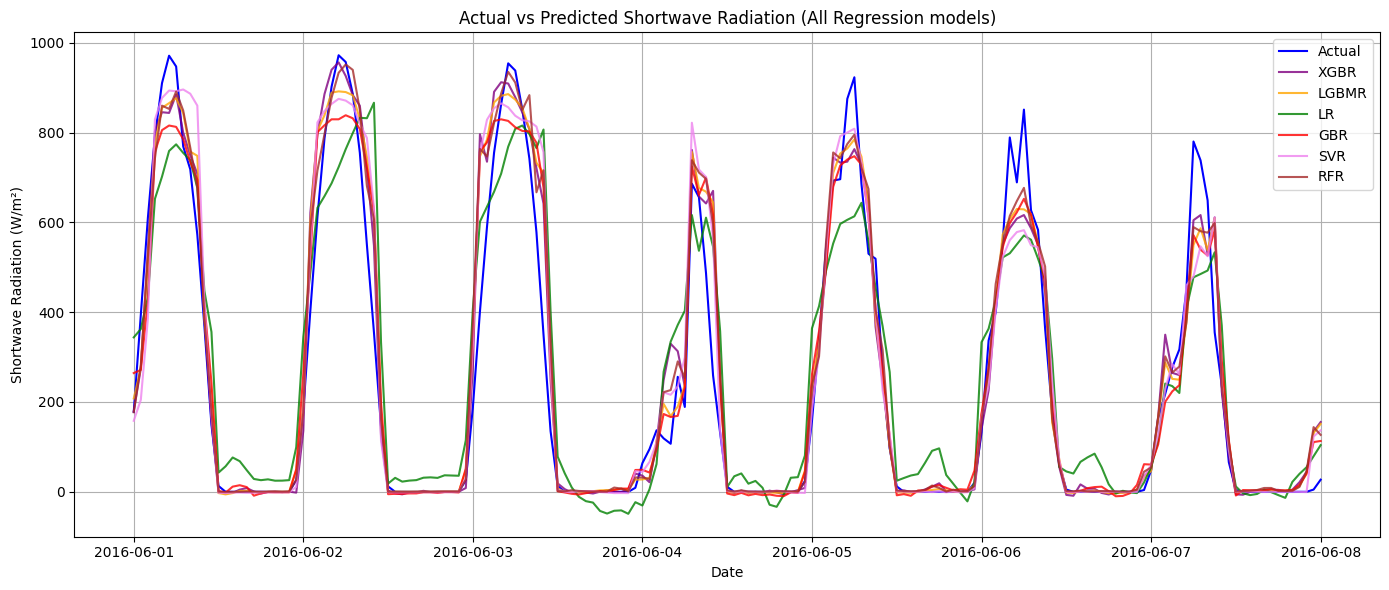

In [17]:
# Đọc dữ liệu và chuyển đổi cột date
test_df = pd.read_csv(f"{TRAINED_DATA}/{METHOD}/shortwave_radiation/test_df.csv", parse_dates=["date"])
model_predictions = pd.read_csv(f"{DATA}/scores&predictions/{METHOD}/shortwave_radiation/model_predictions.csv")

# Kiểm tra điều kiện: actual == temperature_2m_max
matching = model_predictions["actual"].values == test_df["shortwave_radiation"].values

# Gán cột 'date' từ test_df nếu giá trị actual khớp
model_predictions["date"] = np.where(
    matching,
    test_df["date"].values,  # nếu khớp, lấy ngày
    pd.NaT                   # nếu không khớp, để giá trị thời gian trống
)
model_predictions["date"] = pd.to_datetime(model_predictions["date"], errors="coerce")

# Lọc khoảng thời gian từ 01/06/2016 đến 08/06/2016
mask = (model_predictions["date"] >= "2016-06-01 00") & (model_predictions["date"] <= "2016-06-8 00")
subset_df = model_predictions[mask]

# Vẽ biểu đồ
plt.figure(figsize=(14, 6))
plt.plot(subset_df["date"], subset_df["actual"], label="Actual", color="Blue")
plt.plot(subset_df["date"], subset_df["XGBoostRegressor_pred"], label="XGBR", color="Purple", alpha=0.8)
plt.plot(subset_df["date"], subset_df["LightGBMRegressor_pred"], label="LGBMR", color="Orange", alpha=0.8)
plt.plot(subset_df["date"], subset_df["LinearRegression_pred"], label="LR", color="Green", alpha=0.8)
plt.plot(subset_df["date"], subset_df["GradientBoostingRegressor_pred"], label="GBR", color="red", alpha=0.8)
plt.plot(subset_df["date"], subset_df["SupportVectorRegression_pred"], label="SVR", color="violet", alpha=0.8)
plt.plot(subset_df["date"], subset_df["RandomForestRegressor_pred"], label="RFR", color="brown", alpha=0.8)
plt.title("Actual vs Predicted Shortwave Radiation (All Regression models)")
plt.xlabel("Date")
plt.ylabel("Shortwave Radiation (W/m²)")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


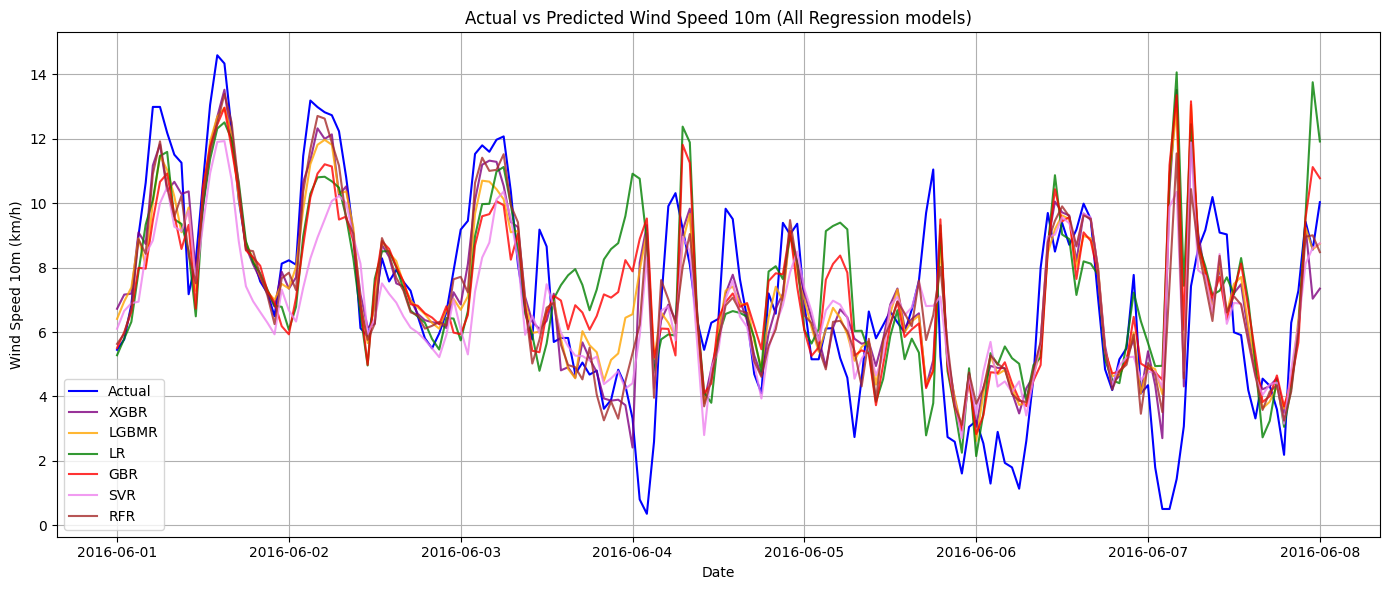

In [18]:
# Đọc dữ liệu và chuyển đổi cột date
test_df = pd.read_csv(f"{TRAINED_DATA}/{METHOD}/wind_speed_10m/test_df.csv", parse_dates=["date"])
model_predictions = pd.read_csv(f"{DATA}/scores&predictions/{METHOD}/wind_speed_10m/model_predictions.csv")

# Kiểm tra điều kiện: actual == temperature_2m_max
matching = model_predictions["actual"].values == test_df["wind_speed_10m"].values

# Gán cột 'date' từ test_df nếu giá trị actual khớp
model_predictions["date"] = np.where(
    matching,
    test_df["date"].values,  # nếu khớp, lấy ngày
    pd.NaT                   # nếu không khớp, để giá trị thời gian trống
)
model_predictions["date"] = pd.to_datetime(model_predictions["date"], errors="coerce")

# Lọc khoảng thời gian từ 01/06/2016 đến 08/06/2016
mask = (model_predictions["date"] >= "2016-06-01 00") & (model_predictions["date"] <= "2016-06-8 00")
subset_df = model_predictions[mask]

# Vẽ biểu đồ
plt.figure(figsize=(14, 6))
plt.plot(subset_df["date"], subset_df["actual"], label="Actual", color="Blue")
plt.plot(subset_df["date"], subset_df["XGBoostRegressor_pred"], label="XGBR", color="Purple", alpha=0.8)
plt.plot(subset_df["date"], subset_df["LightGBMRegressor_pred"], label="LGBMR", color="Orange", alpha=0.8)
plt.plot(subset_df["date"], subset_df["LinearRegression_pred"], label="LR", color="Green", alpha=0.8)
plt.plot(subset_df["date"], subset_df["GradientBoostingRegressor_pred"], label="GBR", color="red", alpha=0.8)
plt.plot(subset_df["date"], subset_df["SupportVectorRegression_pred"], label="SVR", color="violet", alpha=0.8)
plt.plot(subset_df["date"], subset_df["RandomForestRegressor_pred"], label="RFR", color="brown", alpha=0.8)
plt.title("Actual vs Predicted Wind Speed 10m (All Regression models)")
plt.xlabel("Date")
plt.ylabel("Wind Speed 10m (km/h)")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()
